In [21]:
# model imports
# All torch related imports
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import transforms
from torch import nn, optim
import torchvision
from torchvision import models

In [2]:
# system imports
import os
import time

In [3]:
# visualization imports
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [4]:
# pytorch device configurations
BATCH_SIZE = 8
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
IMAGE_DIMS = 224

In [6]:
TEST = pd.read_pickle('./sync_pickles/testing_set.pkl')

In [136]:
DATA_NORMALIZER = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),transforms.Resize((IMAGE_DIMS,IMAGE_DIMS))])

In [162]:
regular_image = TEST.iloc[800].images

In [163]:
normalized_image = DATA_NORMALIZER(TEST.iloc[800].images)

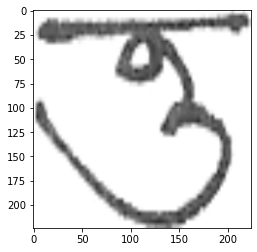

In [164]:
plt.imshow(regular_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


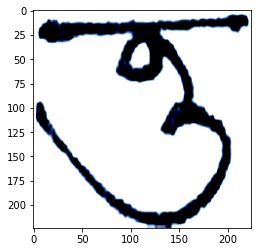

In [165]:
plt.imshow(normalized_image.permute(1,2,0).numpy())

In [166]:
from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp

In [167]:
resnet = models.resnet50(pretrained=False)
resnet.fc = nn.Linear(2048, 171)

In [168]:
resnet.load_state_dict(torch.load('./completed/model_4/resnet_50.pth'))

<All keys matched successfully>

In [169]:
resnet.fc

Linear(in_features=2048, out_features=171, bias=True)

In [170]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [171]:
gradcam = GradCAM(resnet,resnet.layer4)

In [172]:
gradcam_pp = GradCAMpp(resnet,resnet.layer4)

In [173]:
expanded_normalized_image = normalized_image.view(1,3,224,224 )

In [174]:
mask_g, _ = gradcam(expanded_normalized_image)

In [175]:
heatmap_g, result_g = visualize_cam(mask_g, expanded_normalized_image)

In [176]:
mask_g_p , _ = gradcam_pp(expanded_normalized_image)

In [177]:
heatmap_g_p, result_g_p = visualize_cam(mask_g_p, expanded_normalized_image)

In [178]:
pilImage = transforms.ToPILImage()(normalized_image)

In [179]:
type(heatmap_g)

torch.Tensor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


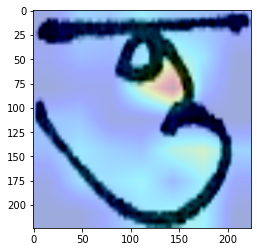

In [180]:
plt.imshow(result_g.permute(1,2,0).numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


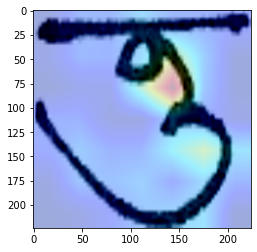

In [181]:
plt.imshow(result_g_p.permute(1,2,0).numpy())